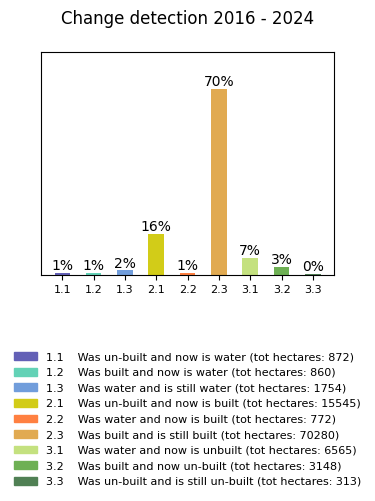

In [8]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Function to read raster data
def read_raster(file_path):
    with rasterio.open(file_path) as src:
        # Initialize an array to hold the data
        data = np.zeros((src.height, src.width), dtype=src.read(1).dtype)
        
        # Iterate over blocks/windows
        for _, window in src.block_windows():
            # Read data from the current window
            raster_window = src.read(1, window=window)
            
            # Update the data array with the window's data
            data[window.row_off:window.row_off + window.height,
                 window.col_off:window.col_off + window.width] = raster_window
            
    return data

# Function to classify raster data into nine categories
def classify_raster(data):
    class_counts = np.zeros(9)
    class_values = [1, 2, 3, 5, 6, 7, 9, 10, 11]
    for i, value in enumerate(class_values):
        class_counts[i] = np.sum(data == value)
    total_pixels = np.sum(class_counts)
    return class_counts, total_pixels

# Function to plot the histogram for the nine classes
def plot_histogram(class_counts, total_pixels):
    class_values = [1, 5, 9, 2, 10, 6, 3, 7, 11]
    new_class_names = ['1.1', '1.2', '1.3', '2.1', '2.2', '2.3', '3.1', '3.2', '3.3']
    categories = [f'Class {value}' for value in class_values]

    # Rearrange class_counts to match the new order
    class_indices = [0, 3, 6, 1, 7, 4, 2, 5, 8]
    class_counts = class_counts[class_indices]
    percentages = (class_counts / total_pixels) * 100
    hectares = np.round(class_counts * 0.01).astype(int)  # Convert pixels to hectares and round to integers

    # Plotting the histogram
    fig, ax = plt.subplots(figsize=(8.2 / 2.54, 10 / 2.54))  # Adjusted figure height
    bar_width = 0.5
    index = np.arange(len(categories))

    colors = ['#6360b6', '#63d2b6', '#719ddb', '#d2cc18', '#ff8041', '#e1aa51', '#c4e17f', '#6eb054', '#508054']

    bars = ax.bar(index, class_counts, bar_width, color=colors)

    # Adding percentage labels on top of each bar
    for bar, percent in zip(bars, percentages):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{round(percent)}%', ha='center', va='bottom', fontsize=10)

    # Add title and labels
    ax.set_title('Change detection 2016 - 2024', fontsize=12, pad=20)
    ax.set_xticks(index)
    ax.set_xticklabels(new_class_names, fontsize=8)

    # Remove y-axis labels and ticks
    ax.set_yticks([])

    # Increase the top limit of y-axis to provide more space
    ax.set_ylim(0, max(class_counts) * 1.2)

    plt.tight_layout(rect=[0, 0, 1, 0.8])  # Adjusted the rect parameter

    # Adding legend below the chart with colors and hectares
    legend_labels = [
        f"1.1    Was un-built and now is water (tot hectares: {hectares[0]})",
        f"1.2    Was built and now is water (tot hectares: {hectares[1]})",
        f"1.3    Was water and is still water (tot hectares: {hectares[2]})",
        f"2.1    Was un-built and now is built (tot hectares: {hectares[3]})",
        f"2.2    Was water and now is built (tot hectares: {hectares[4]})",
        f"2.3    Was built and is still built (tot hectares: {hectares[5]})",
        f"3.1    Was water and now is unbuilt (tot hectares: {hectares[6]})",
        f"3.2    Was built and now un-built (tot hectares: {hectares[7]})",
        f"3.3    Was un-built and is still un-built (tot hectares: {hectares[8]})"
    ]
    legend_patches = [Patch(color=colors[i], label=legend_labels[i]) for i in range(len(colors))]

    # Add the legend
    plt.legend(handles=legend_patches, loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=1, fontsize=8, frameon=False)

    return plt

# Path to the raster file
raster_path = r"C:\Users\andre\OneDrive - Politecnico di Milano\Earth_observation\project\Mod_b\imgs_elab\Change_detection\imgs\Change_detection.tif"

# Load and classify raster
try:
    raster = read_raster(raster_path)
    class_counts, total_pixels = classify_raster(raster)

    # Plot the histogram
    plt = plot_histogram(class_counts, total_pixels)

    # Directory to save the histogram
    save_dir = r"C:\Users\andre\OneDrive - Politecnico di Milano\Earth_observation\project\Mod_b\imgs_elab\Change_detection\pixel_distribution_histograms\class_distribution.png"

    # Save the plot (comment this line to just visualize the plot)
    plt.savefig(save_dir, format='png', dpi=300)

    # Show the plot
    plt.show()

    # Close the plot to release memory
    plt.close()

except Exception as e:
    print(f"Error: {e}")
